In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

In [67]:
d = pd.read_csv('df_to_machine_learning.csv', index_col=False).drop(['uid','voteDate'], axis=1)

In [68]:
d.stillExists = ~d.stillExists
d.columns = ['numVotes', 'churned', 'liked', 'disliked', 'liked_churned_people',
       'vote', 'HappinessEvolution', 'LifeSpan', 'likes', 'dislikes', 'txt_len']

- liked: A boolean that is True if the employee liked the comment.
- disliked: A boolean that is True if the employee disliked the comment.
- likes: Number of likes that the comment received.
- dislikes: Number of dislikes that the comment received.
- CommitmentRate = (nvote+liked+disliked) / Activity

In [70]:
d['CommitmentRate'] = (d.numVotes + d.liked + d.disliked) / d.LifeSpan

In [73]:
d['Activity_freq'] = d.numVotes / d.LifeSpan

In [113]:
d = d[d.LifeSpan > 10]
# Fréquence de remplissage : somme de la différence entre deux activités OK
# nb like/dislike commentaire personne absente ? oui / non OK
# évolution longueur commentaire : croissant / égal / décroissant : pente : OK
# biais du pb : nb vote == longévité, partir != mécontent 
# précision / rappel / courbe roc / matrice confusion OK
# graph stillExists avec les autres features.

In [115]:
d.describe()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,likes,dislikes,txt_len,CommitmentRate,Activity_freq
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000
mean,74.663097,107.668451,19.979407,0.393328,2.916260,0.002689,194.445634,7.121607,1.245717,95.228822,1.246797,0.416825
std,83.615766,208.028723,54.554513,0.488589,0.646211,0.019811,153.057640,5.688733,1.827595,81.584322,1.576926,0.275278
min,2.000000,0.000000,0.000000,0.000000,1.000000,-0.115108,11.000000,0.000000,0.000000,0.750000,0.012346,0.008902
25%,17.000000,10.000000,1.000000,0.000000,2.565217,-0.001593,81.000000,2.859848,0.166667,43.893750,0.330754,0.174252
50%,44.000000,38.000000,4.000000,0.000000,3.000000,0.000391,171.000000,5.600000,0.703704,72.335000,0.757614,0.373448
75%,102.000000,112.250000,16.000000,1.000000,3.333333,0.003608,270.000000,10.000000,1.666667,118.285714,1.500000,0.618774
max,740.000000,3151.000000,891.000000,1.000000,4.000000,0.332168,770.000000,46.000000,33.000000,880.500000,16.304348,1.090909


In [117]:
d.liked_churned_people.sum()

955

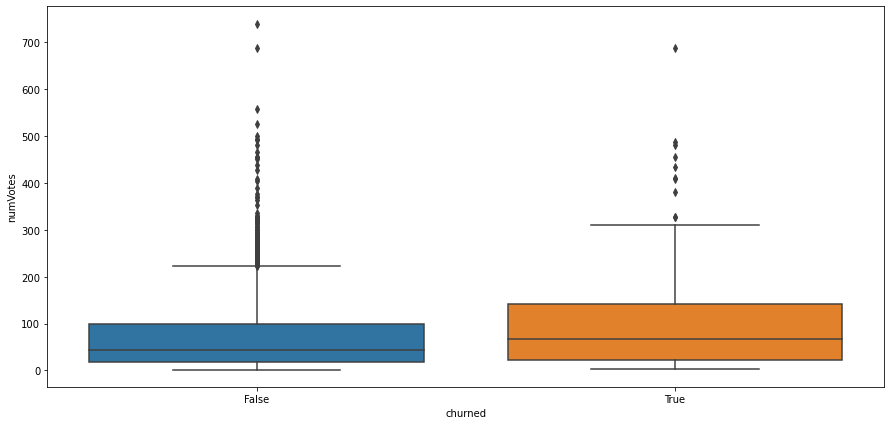

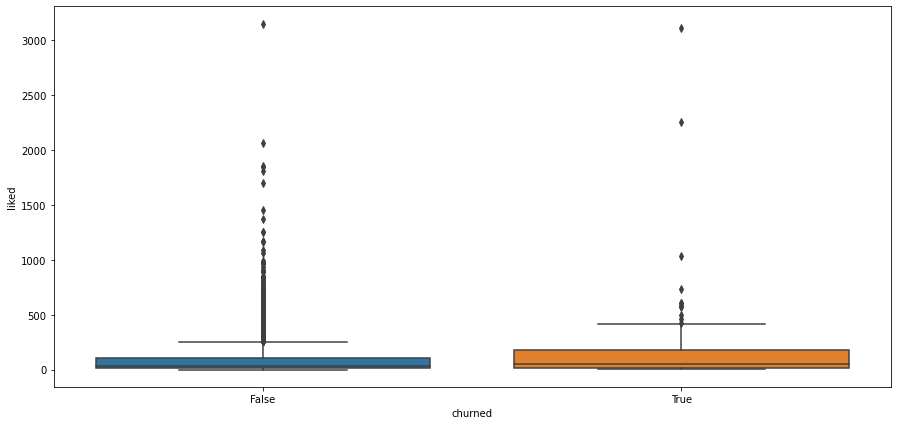

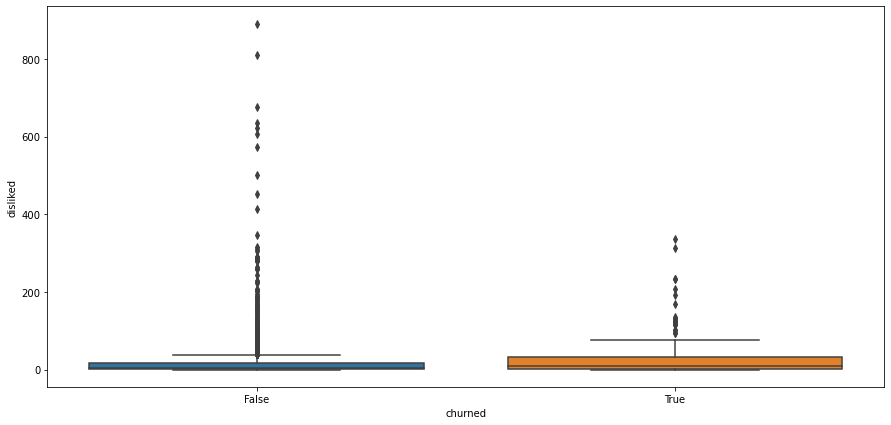

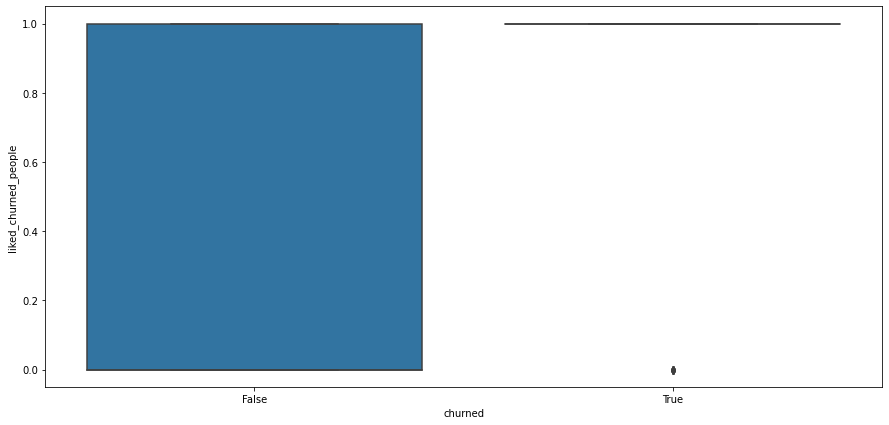

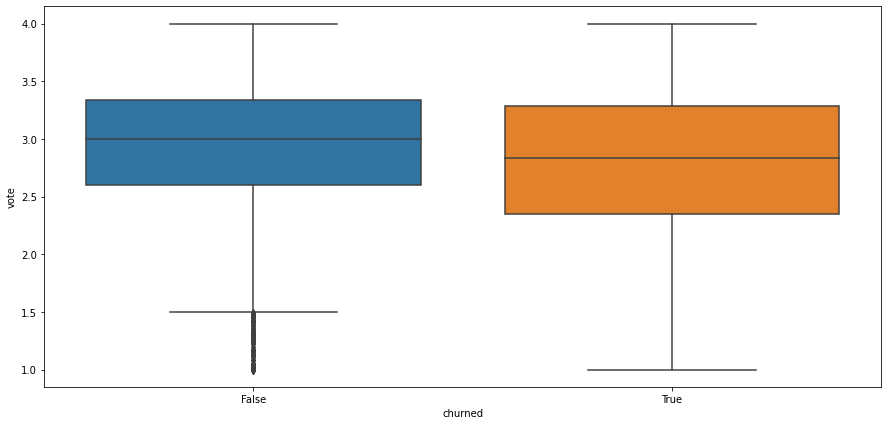

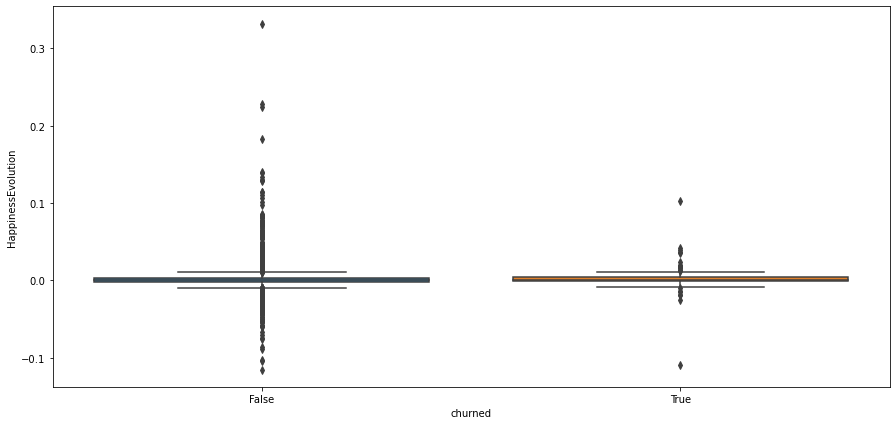

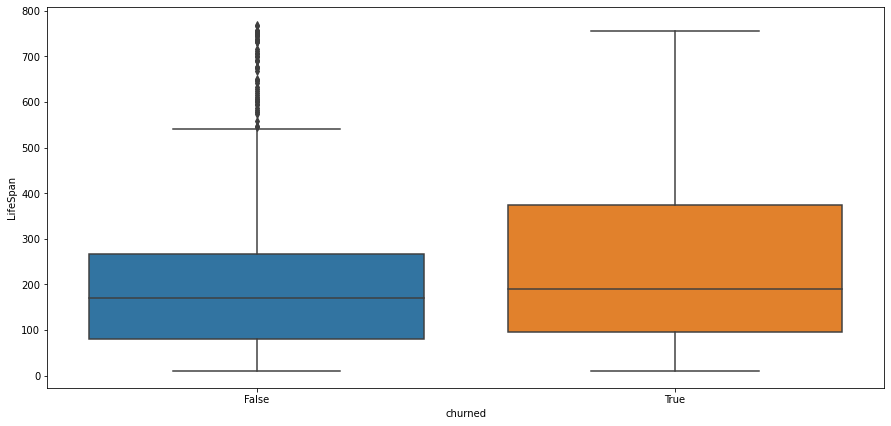

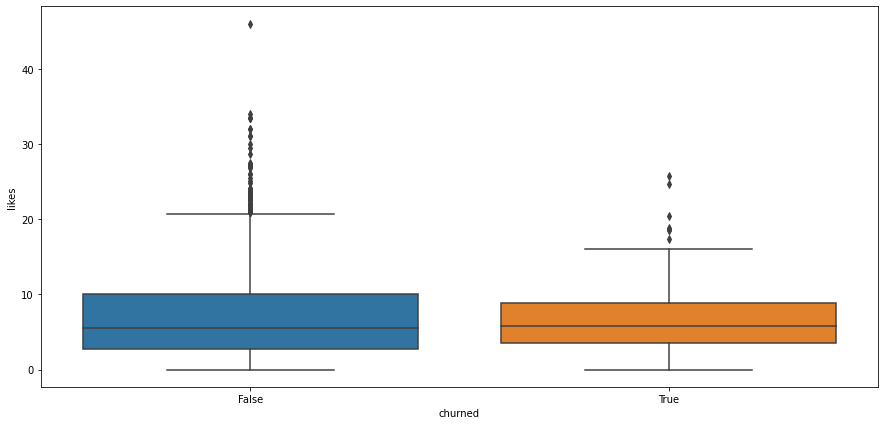

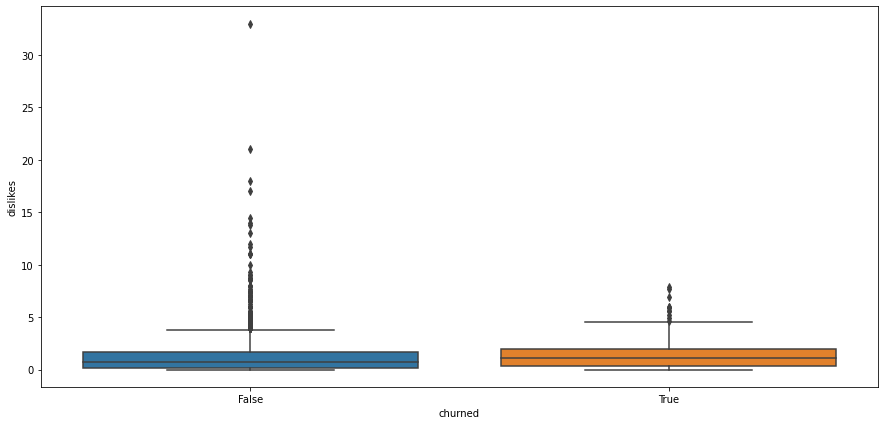

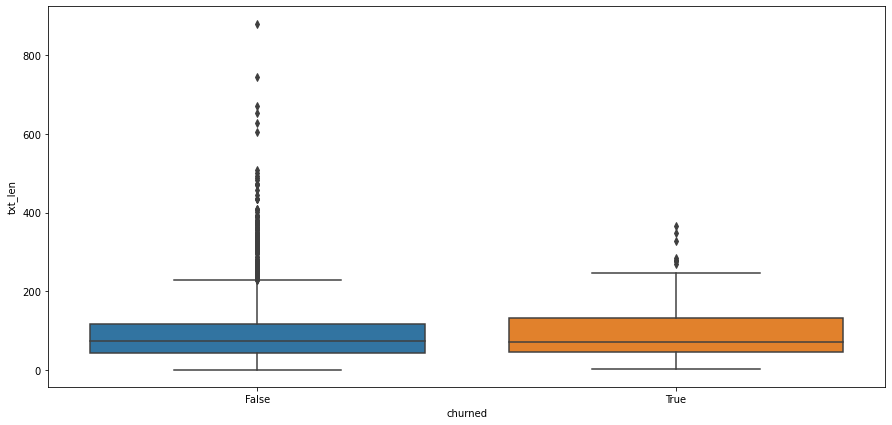

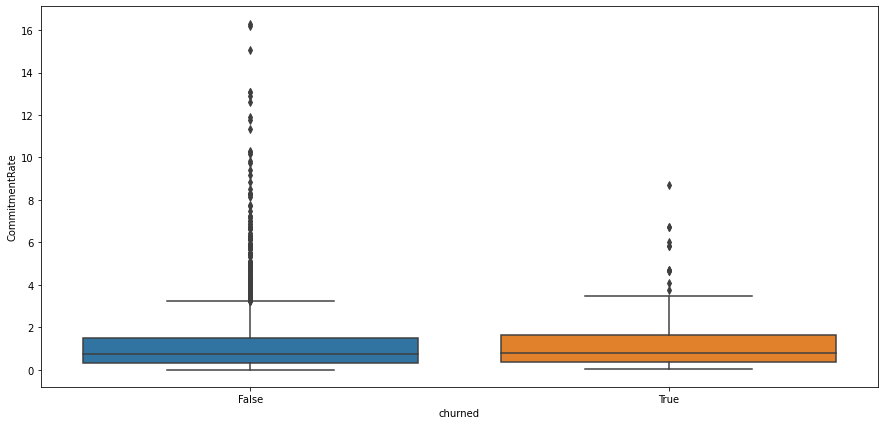

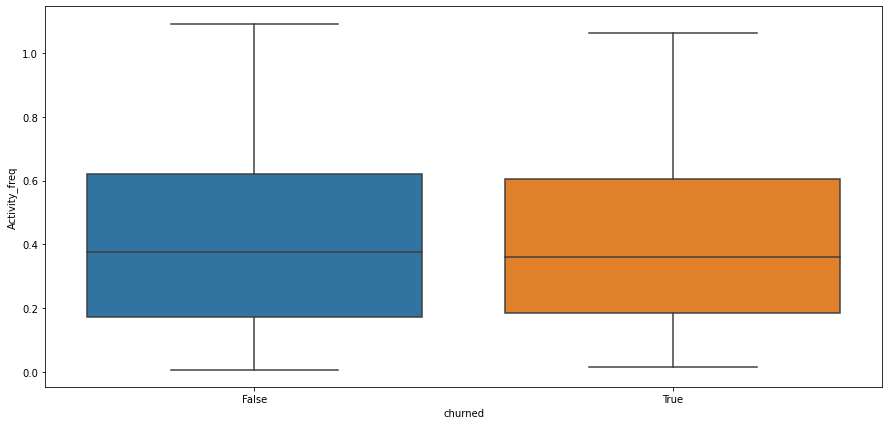

In [118]:
for col in d.columns:
    if col != 'churned':
        fig, ax = plt.subplots(figsize=(15,7))
        sns.boxplot(data=d, x="churned", y=col)
        plt.show()

In [119]:
d.groupby('churned').mean()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,likes,dislikes,txt_len,CommitmentRate,Activity_freq
churned,,,,,,,,,,,,
False,72.564502,104.489769,19.196619,0.350534,2.929207,0.002716,189.556050,7.149986,1.228544,95.199862,1.245221,0.416735
True,100.872222,147.366667,29.755556,0.927778,2.754566,0.002343,255.511111,6.767183,1.460183,95.590507,1.266487,0.417943


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


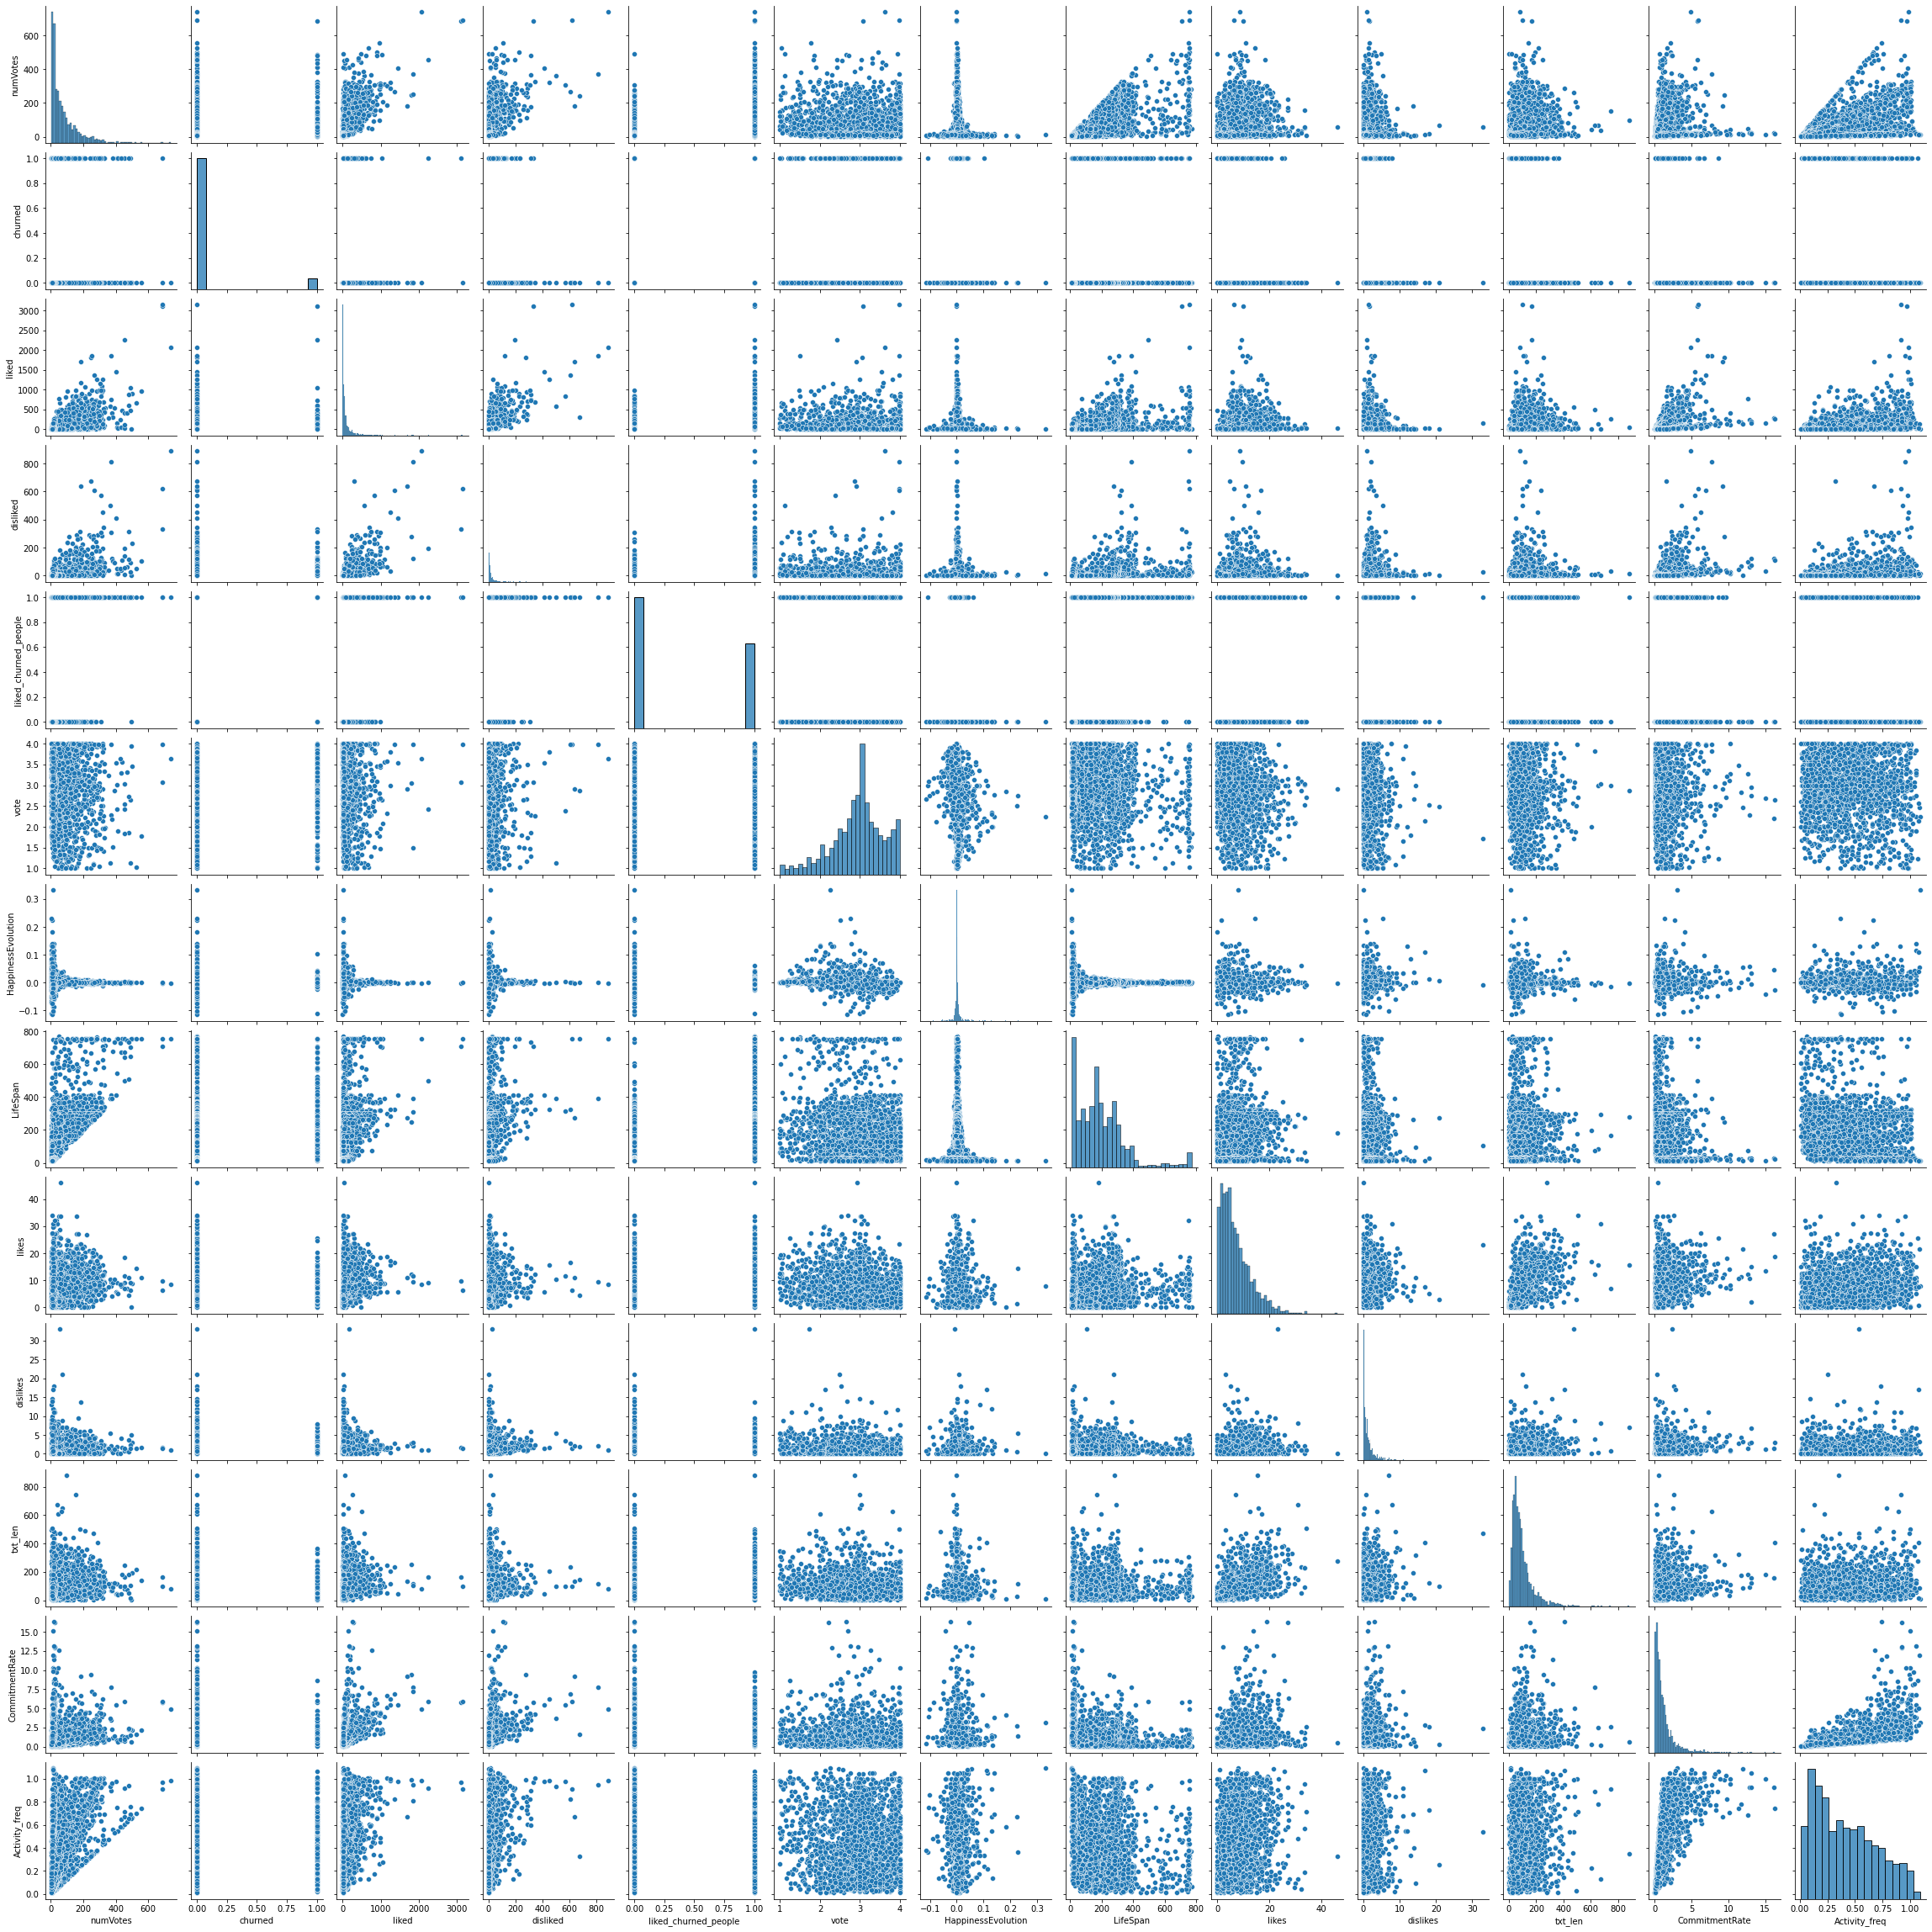

In [120]:
sns.pairplot(d)

<AxesSubplot:>

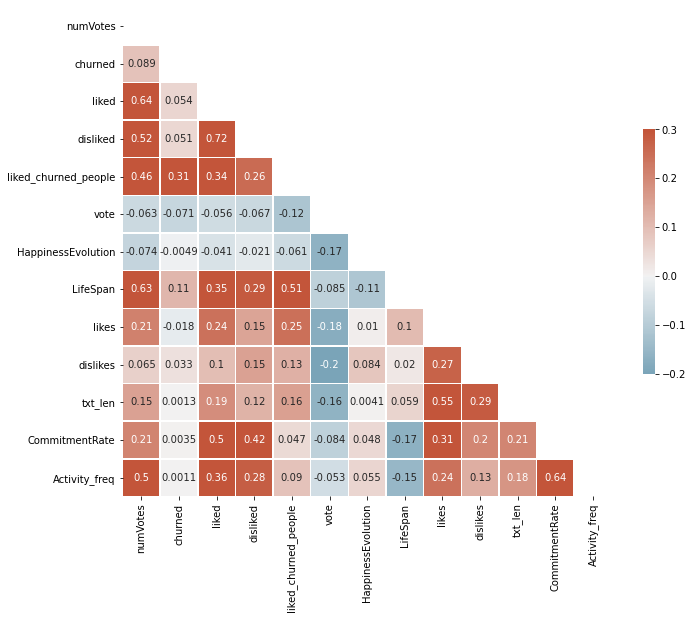

In [121]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [204]:
X = d.drop(columns=['churned'])
y = d[['churned']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)
y_train = y_train.values.reshape(-1)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0).fit(X_train, y_train)
score = clf.score(X_train, y_train)
score

In [163]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
cross_val_score(neigh, X_train, y_train, cv=10, scoring='f1').mean()

0.1190104047998785

In [125]:
neigh.score(X_train, y_train)

0.9402677651905252

In [126]:
neigh.score(X_test, y_test)

0.9135802469135802

In [127]:
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9135802469135802

In [128]:
confusion_matrix(y_test, y_pred)

array([[443,   9],
       [ 33,   1]])

In [129]:
recall = recall_score(y_test, y_pred, average='macro')
recall

0.5047501301405518

# The precision is the ratio tp / (tp + fp) 
## The best value is 1 and the worst value is 0.

In [130]:
precision = precision_score(y_test, y_pred, average='macro')
precision

0.5153361344537816

# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution # of precision and recall to the F1 score are equal. The formula for the F1 score is:

In [131]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.5099882038606172

In [132]:
y_test.value_counts()

churned
False      452
True        34
dtype: int64

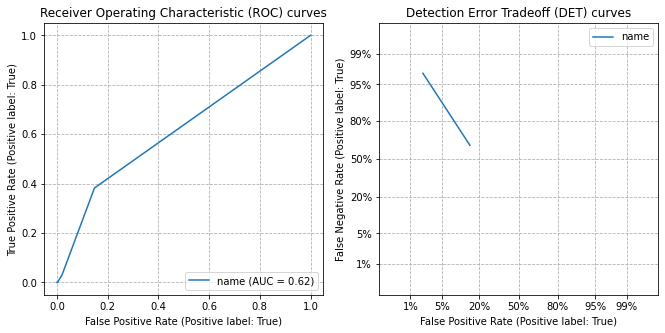

In [133]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(neigh, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(neigh, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [134]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9263645726055613

In [135]:

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9300411522633745

In [136]:


confusion_matrix(y_test, y_pred)

array([[452,   0],
       [ 34,   0]])

In [137]:
y_test.value_counts()

churned
False      452
True        34
dtype: int64

In [138]:
np.unique(y_pred, return_counts=True)

(array([False]), array([486]))

## The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## The best value is 1 and the worst value is 0.

In [139]:


recall_score(y_test, y_pred, average='macro')

0.5

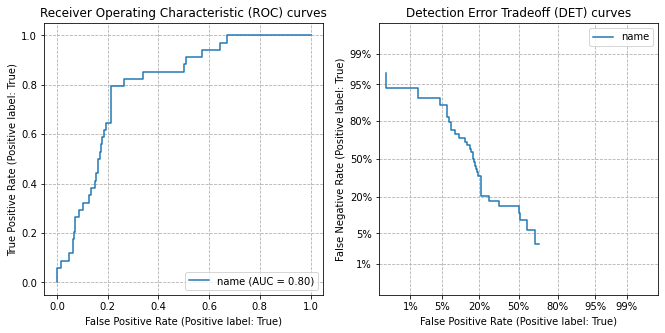

In [140]:

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(clf, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
cross_val_score(gpc, X_train, y_train, cv=10, scoring='f1').mean()

In [154]:
y_train.shape

(1942,)

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.310519286961085

In [195]:
X_train, X_val, y_train, y_val = train_test_split(X_[:,:7], y, test_size=0.33)

In [196]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_val = clf.predict(X_val)

<ipython-input-196-7789a64d3351>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [197]:
from sklearn.metrics import confusion_matrix, classification_report

In [198]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96       744
        True       0.41      0.16      0.23        58

    accuracy                           0.92       802
   macro avg       0.67      0.57      0.59       802
weighted avg       0.90      0.92      0.91       802



In [199]:
print(confusion_matrix(y_val, y_pred_val))

[[731  13]
 [ 49   9]]


In [183]:
y.sum()/y.size

churned    0.074135
dtype: float64

In [184]:
from sklearn.decomposition import PCA

In [186]:
scl = StandardScaler()
X_ = scl.fit_transform(X)
pca = PCA()
pca.fit(X_)

PCA()

In [187]:
pca.explained_variance_ratio_

array([0.29956738, 0.15547331, 0.12565638, 0.0909381 , 0.06814438,
       0.06388588, 0.05925607, 0.04679464, 0.03629292, 0.02736103,
       0.02029289, 0.00633702])

In [182]:
X

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,likes,dislikes,txt_len,CommitmentRate,Activity_freq
0,4,6,0,0,2.500000,-0.000000,37,7.500000,1.000000,114.500000,0.270270,0.108108
1,72,60,12,1,2.250000,-0.000805,406,5.428571,4.785714,59.571429,0.354680,0.177340
2,14,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000,0.227273,0.212121
3,14,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000,0.227273,0.212121
4,22,6,5,0,3.454545,-0.001876,378,3.333333,0.888889,85.555556,0.087302,0.058201
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,10,22,0,0,3.800000,0.020460,13,3.500000,1.500000,53.000000,2.461538,0.769231
2504,7,31,3,0,3.000000,-0.037076,13,2.500000,0.500000,26.500000,3.153846,0.538462
2506,14,36,15,0,2.571429,0.039560,13,0.666667,0.666667,14.333333,5.000000,1.076923
2510,10,4,0,0,2.300000,0.129032,11,3.200000,3.500000,33.600000,1.272727,0.909091


In [158]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.24808612440191385

In [205]:
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [206]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.67902999, 2.3661345 , 0.68037891, 2.53956614, 0.71760707,
        2.48324523]),
 'std_fit_time': array([0.03588839, 0.07038894, 0.02414888, 0.1414419 , 0.05055842,
        0.08951171]),
 'mean_score_time': array([0.03109522, 0.1046699 , 0.03134027, 0.1058526 , 0.03162169,
        0.11062179]),
 'std_score_time': array([0.00310212, 0.01338557, 0.00515906, 0.01281192, 0.00136419,
        0.00776019]),
 'param_max_features': masked_array(data=['auto', 'auto', 'sqrt', 'sqrt', 'log2', 'log2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 700, 200, 700, 200, 700],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 200},
  {'max_features': 'auto', 'n_estimators': 700},
  {'max_features': 'sqrt', 'n_estimators': 200},
  {'max_features': 

In [159]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.12453634085213032

In [160]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.17619235495396485

In [161]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.2850239980251052